In [1]:
import numpy as np
import pandas as pd

In [2]:
from aux_plt import *

In [3]:
df = pd.read_csv("RESULTS.csv.gz", compression="gzip", header=None)
CN = ["ID", "D", "SEED", "a0", "ap0", "bp0", "c0", "cp0", "dp0", "NITER", "LR", "K", "S", "SY", "E", "V", "LAMBDA",
      "iteration", "elapsed", "a", "ap", "bp", "c", "cp", "dp", "loss", "Et", "Vt", "Ee", "Ve", 
      "best_loss", "best_a", "best_ap", "best_bp", "best_c", "best_cp", "best_dp", "best_E", "best_V", "failed"]
df.rename(columns=dict(enumerate(CN)), inplace=True)
df_raw = df
df

,ID,D,SEED,a0,ap0,bp0,c0,cp0,dp0,NITER,...,best_loss,best_a,best_ap,best_bp,best_c,best_cp,best_dp,best_E,best_V,failed
0,0.csv:0,E,0,1.0,100.0,10.0,1.0,100.0,10.0,10001,...,9.504105e+01,1.000000,100.000000,10.000000,1.000000,100.000000,10.000000,0.254043,0.263529,False
1,0.csv:0,E,0,1.0,100.0,10.0,1.0,100.0,10.0,10001,...,8.181926e+01,1.748630,99.006242,8.985977,1.748666,99.007534,8.985977,0.966797,1.045989,False
2,0.csv:0,E,0,1.0,100.0,10.0,1.0,100.0,10.0,10001,...,4.830250e+01,2.719576,97.923525,7.887283,2.719645,97.943973,7.887283,3.031567,3.551749,False
3,0.csv:0,E,0,1.0,100.0,10.0,1.0,100.0,10.0,10001,...,2.638350e+00,3.839758,96.743734,6.668156,3.839829,96.766213,6.668156,8.464265,11.720143,False
4,0.csv:0,E,0,1.0,100.0,10.0,1.0,100.0,10.0,10001,...,6.130576e-02,4.047589,96.529470,6.432015,4.047749,96.543285,6.432015,10.116931,14.656522,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32733,9.csv:9,E,4,1.0,100.0,10.0,1.0,100.0,10.0,1060,...,1.210000e-06,7.333064,94.211483,3.699717,7.328121,93.961819,3.699717,100.270220,440.100665,False
32734,9.csv:9,E,4,1.0,100.0,10.0,1.0,100.0,10.0,1060,...,1.210000e-06,7.333064,94.211483,3.699717,7.328121,93.961819,3.699717,100.288826,439.243184,False
32735,9.csv:9,E,4,1.0,100.0,10.0,1.0,100.0,10.0,1060,...,1.210000e-06,7.333064,94.211483,3.699717,7.328121,93.961819,3.699717,100.283247,440.548180,False
32736,9.csv:9,E,4,1.0,100.0,10.0,1.0,100.0,10.0,1060,...,1.210000e-06,7.333064,94.211483,3.699717,7.328121,93.961819,3.699717,100.280509,439.029748,False


In [4]:
df = df.dropna(axis=0) # NAs!

In [5]:
df["Et"] = df["best_E"]
df["Vt"] = df["best_V"]

In [6]:
#df = df[df.SEED==0] # One run per configuration!

# Auxiliary preprocessing & plotting code

In [7]:
f = lambda x: r"$10^3$" if x==1000 else "$%s$" % x 

In [8]:
def dfs(df, a0, ap0, bp0, c0, cp0, dp0, E=-1, V=-1, LAMBDA=0.0):  
    d1 = df[(df.LAMBDA==0.0) & (df.V==V) & (df.E==E)]
    d1 = d1.drop(columns=["failed"])

    d11 = d1[(d1.a0==a0)&(d1.ap0==ap0)&(d1.bp0==bp0)&(d1.c0==c0)&(d1.cp0==cp0)&(d1.dp0==dp0)]
    #print("a0=%s b0=%s c0=%s d0=%s => %s" % (a0,b0,c0,d0, len(d11)))

    means = d11.groupby(["iteration"]).mean().reset_index()
    stds = d11.groupby(["iteration"]).std().reset_index()
    assert (means.iteration == stds.iteration).all()
    return means, stds

In [9]:
from matplotlib.collections import LineCollection

def coloredline(x, y, colors, 
                cmin=None, cmax=None, lw=2.5, cmap="Reds", alpha=1.0, log=True):
    assert (x>0).all()
    assert (y>0).all()
    
    colors = np.array(colors)
    if log and colors.min()==0: colors = colors + 1

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a continuous norm to map from data points to colors    
    cmin=colors.min() if cmin is None else cmin
    cmax=colors.max() if cmax is None else cmax    
    norm = mpl.colors.LogNorm(cmin,cmax) if log else plt.Normalize(cmin, cmax)     
    
    
    lc = LineCollection(segments, cmap=cmap, norm=norm, alpha=alpha)
    # Set the values used for colormapping
    lc.set_array(colors)
    lc.set_linewidth(lw)
    line = plt.gca().add_collection(lc)
    return line

# Configuration

In [10]:
CFGS = [(1.0, 100.0, 10.0, 1.0, 100.0, 10.0), #K
        (0.1, 100.0, 1.0, 1.0, 100.0, 1.0), #L     
        (50.0, 5000.0, 10.0, 1.0 ,  5000.0 , 1.0),  #M
        (1.0, 100.0, 1.0, 10.0, 10.0, 1.0),  #N  
        (450.0, 4500.0, 100.0, 10.0 ,  400.0 , 1.0), #O
        (50.0, 50.0, 1.0, 1.0 ,  50.0 , 1.0), #P  
        ]



LABELS = "KLMNOPQRSTXYZ"

SCALES = ['Reds_r', 'Blues_r', 'Greens_r', 'Oranges_r',  'Greys_r',  
          'Purples_r','YlOrBr_r',                    
          'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
           'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
COLORS2 = ["red", "dodgerblue", "green", "orange", "gray",  "purple",  "brown", 
           "yellow", "black", "pink", "maroon", "darkgreen"
           ]
COLORS1 = ["salmon", "dodgerblue", "yellowgreen",  "orange", "gray", "purple",  "brown", 
           "yellow", "black", "pink", "maroon", "darkgreen"
          ]

In [11]:
for E in df.E.unique():
    for V in df.V.unique():
        for a0, ap0, bp0, c0, cp0, dp0 in CFGS:
            for S, SY in [(1000,10)]:
                d = dfs(df, a0, ap0, bp0, c0, cp0, dp0, E, V)[0]
                print("E=%s,V=%s  a=%.3f,ap=%.3f,bp=%.3f,c=%.3f,cp=%.3f,dp=%.3f => %s" % 
                        (E,V, a0, ap0, bp0, c0, cp0, dp0,len(d)))

E=10.0,V=-1.0  a=1.000,ap=100.000,bp=10.000,c=1.000,cp=100.000,dp=10.000 => 20
E=10.0,V=-1.0  a=0.100,ap=100.000,bp=1.000,c=1.000,cp=100.000,dp=1.000 => 20
E=10.0,V=-1.0  a=50.000,ap=5000.000,bp=10.000,c=1.000,cp=5000.000,dp=1.000 => 23
E=10.0,V=-1.0  a=1.000,ap=100.000,bp=1.000,c=10.000,cp=10.000,dp=1.000 => 27
E=10.0,V=-1.0  a=450.000,ap=4500.000,bp=100.000,c=10.000,cp=400.000,dp=1.000 => 46
E=10.0,V=-1.0  a=50.000,ap=50.000,bp=1.000,c=1.000,cp=50.000,dp=1.000 => 75
E=10.0,V=100.0  a=1.000,ap=100.000,bp=10.000,c=1.000,cp=100.000,dp=10.000 => 1010
E=10.0,V=100.0  a=0.100,ap=100.000,bp=1.000,c=1.000,cp=100.000,dp=1.000 => 1010
E=10.0,V=100.0  a=50.000,ap=5000.000,bp=10.000,c=1.000,cp=5000.000,dp=1.000 => 1010
E=10.0,V=100.0  a=1.000,ap=100.000,bp=1.000,c=10.000,cp=10.000,dp=1.000 => 1010
E=10.0,V=100.0  a=450.000,ap=4500.000,bp=100.000,c=10.000,cp=400.000,dp=1.000 => 1010
E=10.0,V=100.0  a=50.000,ap=50.000,bp=1.000,c=1.000,cp=50.000,dp=1.000 => 1010
E=10.0,V=1000.0  a=1.000,ap=100.000,

# 1D Plots

In [12]:
df = df_raw

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
COLORS = COLORS1
s = lambda x: np.array(running_mean(np.array(x), 10))

0) 1.0 & 100.0 & 10.0 & 1.0  &  100.0  & 10.0  => d11=5050
K salmon
1) 0.1 & 100.0 & 1.0 & 1.0  &  100.0  & 1.0  => d11=2792
L dodgerblue
2) 50.0 & 5000.0 & 10.0 & 1.0  &  5000.0  & 1.0  => d11=3800
M yellowgreen
3) 1.0 & 100.0 & 1.0 & 10.0  &  10.0  & 1.0  => d11=4676
N orange
4) 450.0 & 4500.0 & 100.0 & 10.0  &  400.0  & 1.0  => d11=3467
O gray
5) 50.0 & 50.0 & 1.0 & 1.0  &  50.0  & 1.0  => d11=3043
P purple


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


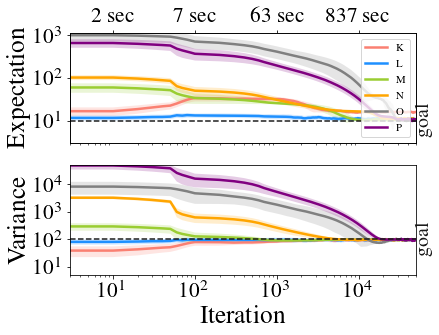

In [15]:
    E, V = 10, 100
    XLABEL, XMIN, XMAX, XCOL = "Iteration", 3, 50000, "iteration"
    alpha = 0.2
    
    d1 = df[(df.LAMBDA==0.0) & (df.E==E) & (df.V==V)]
    d1 = d1.drop(columns=["failed"])
    
    start_plotting(cmbright=False)
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)

    for i, (a0, ap0, bp0, c0, cp0, dp0) in enumerate(CFGS):  
        d11 = d1[(d1.a0==a0)&(d1.ap0==ap0)&(d1.bp0==bp0)&(d1.c0==c0)&(d1.cp0==cp0)&(d1.dp0==dp0)]
        print("%i) %s & %s & %s & %s  &  %s  & %s  => d11=%s" % (i, a0, ap0, bp0, c0, cp0, dp0, len(d11)))
        print(LABELS[i], COLORS[i])        
        
        means = d11.groupby(["iteration"]).mean().reset_index()
        stds = d11.groupby(["iteration"]).std().reset_index()
        assert (means.iteration == stds.iteration).all()
        iteration = means[XCOL]
        
        plt.sca(ax1)
        errorfill((iteration), s(means["Et"]), s(stds["Et"]), color=COLORS[i], 
                  lw=2.5, alpha_fill=alpha, label=LABELS[i])
        plt.sca(ax2)
        errorfill((iteration), s(means["Vt"]), s(stds["Vt"]), color=COLORS[i], 
                  lw=2.5, alpha_fill=alpha)
        
        
    axT = ax1.twiny()
    axT.set_xlim(XMIN,XMAX)
    axT.set_xscale("log")    
    time10 = df[df.iteration==10]["elapsed"].mean()
    time100 = df[df.iteration==100]["elapsed"].mean()
    time1000 = df[df.iteration==1000]["elapsed"].mean()
    time10000 = df[df.iteration==10000]["elapsed"].mean()
    axT.set_xticks([10,100,1000, 10000])
    axT.set_xticklabels([str(round(time10))+" sec", str(round(time100))+" sec",
                         str(round(time1000))+" sec",str(round(time10000))+" sec"])
    axT.tick_params(which='minor', length=0)
    

    plt.sca(ax1)
    plt.ylabel(r"Expectation")

    plt.legend(fontsize=11, loc=5)    

    
    plt.xlim(XMIN,XMAX)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylim(3,1100)
    plt.gca().set_yticks([10,100,1000])
    plt.xticks([],[])

    goal = means["E"][0]
    plt.axhline(goal, lw=1.5, color="k", ls="--")    
    x1,x2 = plt.xlim()
    plt.text(x2*0.965, goal, "goal", ha="left", va="center", 
             color="k",  alpha=1.0, fontsize=20, rotation=90)

    
    plt.sca(ax2)    
    plt.xlabel(XLABEL)
    plt.ylabel(r"Variance")


    
    plt.xlim(XMIN,XMAX)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylim(5,50000)
    plt.gca().set_yticks([10,100,1000,10000])
    
    goal = means["V"][0]
    plt.axhline(goal, lw=1.5, color="k", ls="--")    
    x1,x2 = plt.xlim()
    plt.text(x2*0.965, goal, "goal", ha="left", va="center", 
             color="k",  alpha=1.0, fontsize=20, rotation=90)
    

    plt.subplots_adjust(left=0.2, right=0.95, top=0.9, bottom=0.2)    
    plt.savefig("hpf_convergence_E%sV%s_1D.pdf" % (E,V))
    plt.show()

# 2D PLOTS

In [16]:
COLORS = COLORS2
df = df_raw
#df = df_raw[df_raw.SEED==0] # One run per configuration!

In [17]:
def smooth(v, step=7):
    #return v
    v = np.array(v)
    v = np.array([v[0]]+[np.mean(v[i:(i+step)]) for i in range(1, len(v), step)])
    return v

K. 1010 data pts
L. 1010 data pts
M. 1010 data pts
N. 1010 data pts
O. 1010 data pts
P. 1010 data pts


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


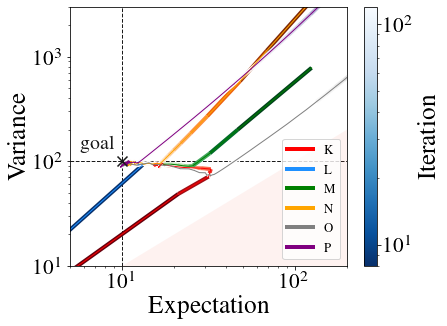

In [18]:
cmin, cmax = 8, 120
COLORDIM, COLORLABEL = "iteration", "Iteration"
#csmooth = smooth
csmooth = lambda x: x
width, lw = 4, 1
E, V = 10, 100
LS = "-"
max_iter = 50000

start_plotting(cmbright=False)
#########################################################################################
l = [None for i in range(len(CFGS))] #lines
for i, label in zip(range(len(CFGS)), LABELS):  
  a0, ap0, bp0, c0, cp0, dp0 = CFGS[i]        
  means, stds = dfs(df, a0, ap0, bp0, c0, cp0, dp0, E=E, V=V)  
  print("%s. %i data pts" % (label, len(means)))

  if label=="M": means = means[means.iteration<=4500]    
  if label=="L": means = means[means.iteration<=1500]    
  means = means[means.iteration<=max_iter]    
  l[i] = coloredline(smooth(means["Et"]), smooth(means["Vt"]), csmooth(means[COLORDIM]), 
                   cmap=SCALES[i%len(SCALES)], lw=width, cmin=cmin, cmax=cmax)
  plt.plot(smooth(means["Et"]), smooth(means["Vt"]), lw=lw, color=COLORS[i], ls=LS)    


plt.axvline(E, color="k", lw=1, ls="--", zorder=-1)
plt.axhline(V, color="k", lw=1, ls="--", zorder=-1)
# plt.scatter([E],[V], marker="x", color="salmon", s=100, zorder=10)
# plt.text(E-70,V-3,"infeasible goal", ha="center", va="top", color="salmon",  fontsize=20)
plt.scatter([E],[V], marker="x", color="k", s=100, zorder=10)
plt.text(E-1,V+20,"goal", ha="right", va="bottom", color="k",  alpha=1.0, fontsize=20)
#########################################################################################

plt.fill_between([0.0001,10000],[0.0001,10000], color="salmon", lw=0, alpha=0.1)

plt.gcf().colorbar(l[1], ax=plt.gca(), label=COLORLABEL)
from matplotlib.lines import Line2D
selected = list(range(len(CFGS)))
custom_lines = [Line2D([0], [0], color=COLORS[i], lw=4) for i in selected]
plt.gca().legend(custom_lines, [LABELS[i] for i in selected], fontsize=13, loc=4)
        
plt.xlim(5, 200)
plt.xscale("log")
plt.ylim(10, 3000)
plt.yscale("log")

plt.xlabel("Expectation")
plt.ylabel("Variance")

plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.2)    
plt.savefig("hpf_convergence_E%sV%s.pdf" % (E,V))
plt.show()